### ! 7_1은 머신러닝의 기본적이고 간단한 개념 설명이므로 pass

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 단순회귀분석

In [16]:
## 데이터 준비
df = pd.read_csv('e:/data_파이썬머신러닝판다스데이터분석/part7/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

pd.set_option('display.max_columns', 10) # 표시할 컬럼 수 설정(안하면 중간이 생략되서 출력됨)

print(df.head(), '\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino   



In [17]:
## 데이터 탐색
print(df.info(), '\n')
print(df.describe(), '\n')

# horsepower 자료타입이 문자이므로 숫자로 변환
print(df['horsepower'].unique(), '\n') # 데이터 중 ? 존재

df.horsepower.replace('?', np.nan, inplace=True) # ?를 NaN으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True) # horsepower 컬럼에 NaN이 포함된 행 제거
df['horsepower'] = df['horsepower'].astype('float') # 숫자형으로 변경

print(df.describe(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None 

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [18]:
## 속성(feature) 선택
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head(), '\n')

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0 



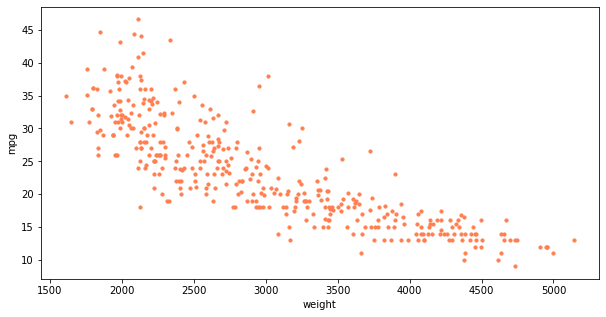

In [20]:
## 각 피쳐별 산점도 확인 - 피쳐간 상관관계가 있는지 없는지에 대해 대략적으로 파악하기 위함 
ndf.plot(kind='scatter', x= 'weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.show()
plt.close()

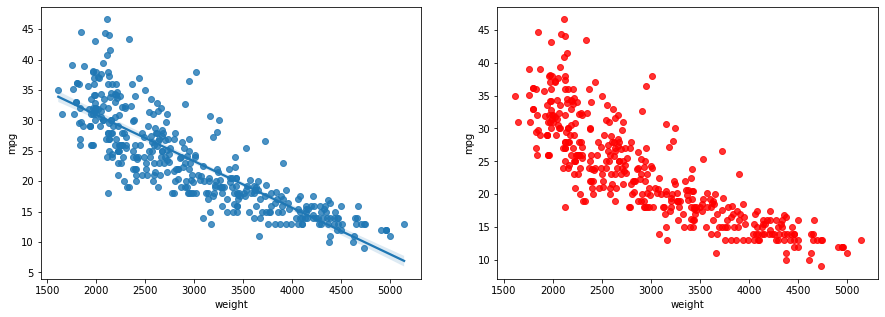

In [23]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False, color='r') # 회귀선 옵션 설정, 색상 설정 추가
plt.show()
plt.close()

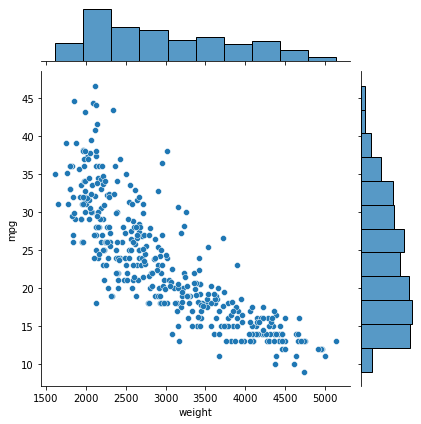

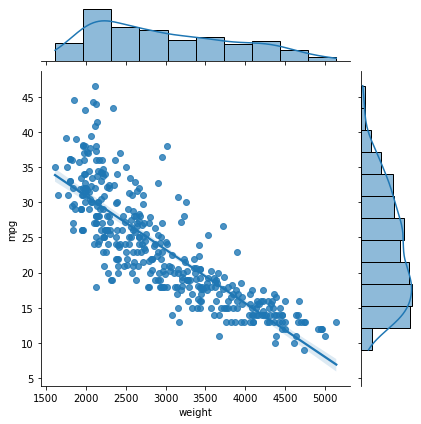

In [29]:
# 산점도와 히스토그램 한번에 그리기
sns.jointplot(x='weight', y='mpg', data=ndf,) # 회귀선 미표시
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg') # 회귀선 표시
plt.show()
plt.close()

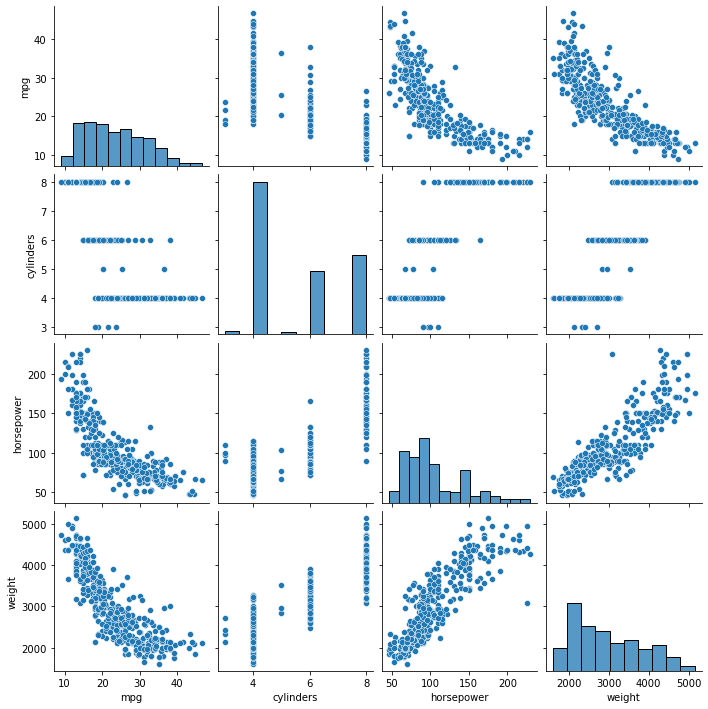

In [30]:
## 모든 경우의 수에 대한 산점도 확인
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [38]:
## train/test data 분할
X = ndf[['weight']] # ['weight']가 아닌 이유 : 참고란에 설명
y = ndf['mpg']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10) # train:test=7:3, random seed 고정 옵션 설정

print(f'train data 개수 : {len(X_train)}')
print(f'test data 개수 : {len(X_test)}')

train data 개수 : 274
test data 개수 : 118


In [46]:
## 참고
# skelarn의 fit 메소드는 train data를 1차원이 아닌 2차원으로 받음
# ndf['weight']와 ndf[['weight']]의 shape를 확인하면 이해 가능
print(ndf['weight'].shape, '\n') # 1차원
print(ndf[['weight']].shape, '\n') # 2차원
print(pd.DataFrame(np.array(ndf['weight']).reshape(len(ndf['weight']),-1)).shape, '\n') # array로 변경해 reshape를하고 다시 데이터프레임으로 변환해도 됨

(392,) 

(392, 1) 

(392, 1) 



In [39]:
## 모형 학습 및 검증
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() # 선형회귀 모델 객체 생성
lr.fit(X_train, y_train) # 모델 학습
r_square = lr.score(X_test, y_test) # 결정계수 확인
print(r_square)

0.6822458558299325


In [40]:
## 회귀방정식의 y절편과 계수(기울기) 확인
print(f'기울기 : {lr.coef_}','\n')
print(f'y절편 : {lr.intercept_}','\n')

기울기 : [-0.00775343] 

y절편 : 46.710366257280086 



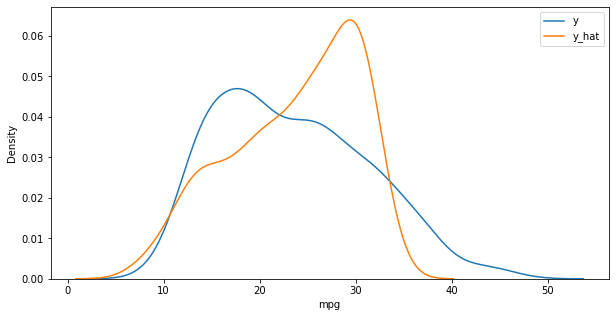

In [41]:
## 예측(교재 내용)
y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

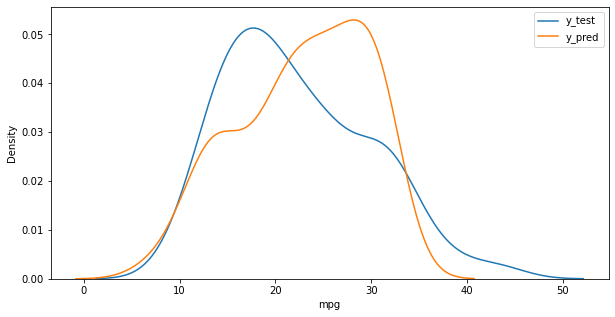

In [42]:
## 예측(실제로 해야하는 과정)
# 교재에서는 훈련용으로 사용한 데이터를 포함해 테스트를 했지만, 실제는 테스트용으로 분리한 데이터를 사용해 예측값을 얻고 실제값과 비교해야함
y_pred = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_pred, label='y_pred', ax=ax1)
plt.legend()
plt.show()

# 다항회귀분석

In [66]:
## 데이터 준비 : 단순선형회귀분석과 동일하므로 구체적인 과정은 생략
df = pd.read_csv('e:/data_파이썬머신러닝판다스데이터분석/part7/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df.horsepower.replace('?', np.nan, inplace=True) 
df.dropna(subset=['horsepower'], axis=0, inplace=True) 
df['horsepower'] = df['horsepower'].astype('float') 

## train/test data 분할
X = ndf[['weight']] 
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10) # train:test=7:3, random seed 고정 옵션 설정

print(f'train data : {X_train}')
print(f'test data : {X_test}')

train data :      weight
38   4209.0
172  2223.0
277  3410.0
196  2164.0
357  2615.0
..      ...
375  1980.0
322  2110.0
15   2833.0
127  2901.0
267  2560.0

[274 rows x 1 columns]
test data :      weight
243  2720.0
371  2525.0
300  3420.0
345  1760.0
265  4080.0
..      ...
384  1965.0
20   2672.0
189  3962.0
60   2408.0
227  3630.0

[118 rows x 1 columns]


In [67]:
## 모형 학습 및 검증
from sklearn.linear_model import LinearRegression # 선형회귀분석을 위한 모듈 호출
from sklearn.preprocessing import PolynomialFeatures # 다항식으로 변환을 위한 모듈 호출

# 다항식 변환
poly = PolynomialFeatures(degree=2) # 단일항을 2차항으로 변환하기 위한 객체 생성
X_train_poly = poly.fit_transform(X_train) # 1차항이던 원본 데이터를 [상수항,1차항(원본),2차항(원본의제곱)]으로 바꾸어 원래 데이터 형태로 반환해줌

print(f'원본 X_train : {X_train}', '\n')
print(f'2차항 변환 X_train : {X_train_poly}', '\n')

원본 X_train :      weight
38   4209.0
172  2223.0
277  3410.0
196  2164.0
357  2615.0
..      ...
375  1980.0
322  2110.0
15   2833.0
127  2901.0
267  2560.0

[274 rows x 1 columns] 

2차항 변환 X_train : [[1.0000000e+00 4.2090000e+03 1.7715681e+07]
 [1.0000000e+00 2.2230000e+03 4.9417290e+06]
 [1.0000000e+00 3.4100000e+03 1.1628100e+07]
 [1.0000000e+00 2.1640000e+03 4.6828960e+06]
 [1.0000000e+00 2.6150000e+03 6.8382250e+06]
 [1.0000000e+00 2.3850000e+03 5.6882250e+06]
 [1.0000000e+00 2.7950000e+03 7.8120250e+06]
 [1.0000000e+00 3.2450000e+03 1.0530025e+07]
 [1.0000000e+00 3.1020000e+03 9.6224040e+06]
 [1.0000000e+00 2.5060000e+03 6.2800360e+06]
 [1.0000000e+00 3.5700000e+03 1.2744900e+07]
 [1.0000000e+00 1.9400000e+03 3.7636000e+06]
 [1.0000000e+00 2.9900000e+03 8.9401000e+06]
 [1.0000000e+00 2.0850000e+03 4.3472250e+06]
 [1.0000000e+00 2.8550000e+03 8.1510250e+06]
 [1.0000000e+00 3.2880000e+03 1.0810944e+07]
 [1.0000000e+00 2.1250000e+03 4.5156250e+06]
 [1.0000000e+00 2.2460000e+03 5.044

In [68]:
# 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

# 결정계수 확인
X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square, '\n')

0.708700926297548 



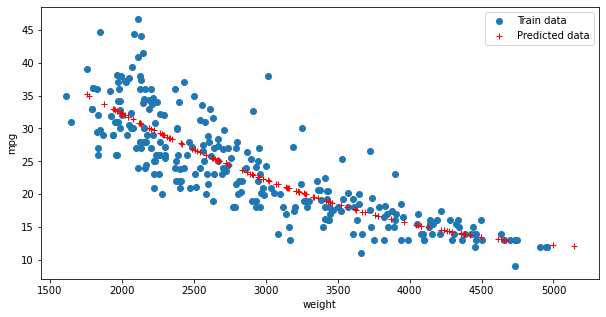

In [69]:
# 예측
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train data') # 학습 데이터 분포 확인
ax.plot(X_test, y_hat_test, 'r+', label='Predicted data') # 테스트 데이터를 사용해 예측한 데이터 확인
ax.legend(loc=0)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

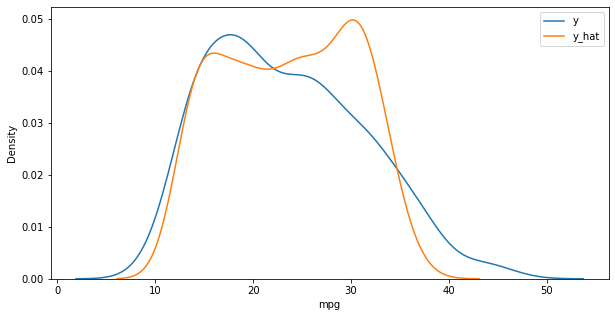

In [70]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y, label='y')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()

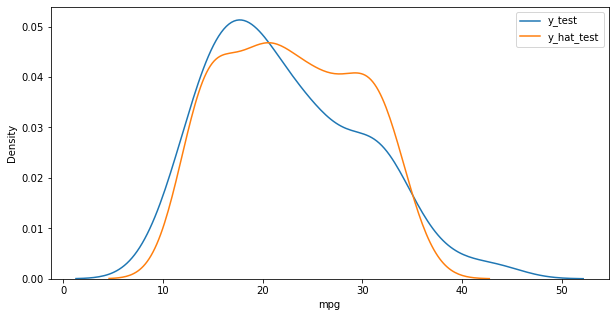

In [71]:
plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat_test, label='y_hat_test', ax=ax1)
plt.legend()
plt.show()

# 다중회귀분석

In [75]:
## 단순, 다중 회귀 분석과 같은 데이터 사용
# 피쳐 선택
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

print(f'train data : {X_train}')
print(f'test data : {X_test}')

train data :      cylinders  horsepower  weight
38           8       165.0  4209.0
172          4        71.0  2223.0
277          6       133.0  3410.0
196          4        60.0  2164.0
357          4       100.0  2615.0
..         ...         ...     ...
375          4        74.0  1980.0
322          4        65.0  2110.0
15           6        95.0  2833.0
127          6       100.0  2901.0
267          4        95.0  2560.0

[274 rows x 3 columns]
test data :      cylinders  horsepower  weight
243          3       110.0  2720.0
371          4        84.0  2525.0
300          8        90.0  3420.0
345          4        60.0  1760.0
265          8       140.0  4080.0
..         ...         ...     ...
384          4        67.0  1965.0
20           4        87.0  2672.0
189          8       120.0  3962.0
60           4        90.0  2408.0
227          6       100.0  3630.0

[118 rows x 3 columns]


In [76]:
# 학습 및 검증
lr = LinearRegression()
lr.fit(X_train,y_train)

r_square = lr.score(X_test, y_test)
print(r_square, '\n')

print(f'회귀식 : mpg={lr.intercept_}+{lr.coef_[0]}*cylinders+{lr.coef_[1]}*horsepower+{lr.coef_[2]}*weight', '\n')

0.6939048496695599 

회귀식 : mpg=46.414351269634+-0.6069128839707727*cylinders+-0.03714088474052203*horsepower+-0.005222677979892239*weight 



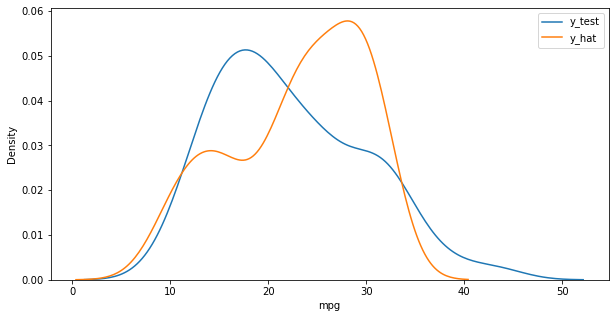

In [77]:
# 예측 및 실제값과 비교
y_hat = lr.predict(X_test)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y_test, label='y_test')
ax2 = sns.kdeplot(y_hat, label='y_hat', ax=ax1)
plt.legend()
plt.show()